## Observations and Insights 

- Specifically for the following drug regimens, Capomulin, Ramicane, Infubinol, and Ceftamin, the total volume of the tumor decreased as time increased. So as time passed the tumor essentially gotten smaller.
- Capomulin and Ramicane had the highest number of Timepoint measurements than the remaining drug Regimens.
- As the mouse increased in weigh, the tumor volume also increased on average for the drug regimen Capomulin. 

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
mouse_study_complete.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [3]:
# Checking the number of mice.
total_mice = mouse_study_complete["Mouse ID"].nunique()
print(total_mice)

249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_data = mouse_study_complete[mouse_study_complete.duplicated(subset=['Mouse ID','Timepoint'])]
duplicated_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = mouse_study_complete.loc[mouse_study_complete["Mouse ID"] == 'g989']
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = mouse_study_complete.loc[mouse_study_complete["Mouse ID"] != 'g989']
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_total = clean_data["Mouse ID"].nunique()
clean_total

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
group_drug_df = clean_data.groupby(['Drug Regimen'])

drug_mean = group_drug_df['Tumor Volume (mm3)'].mean()
drug_median = group_drug_df['Tumor Volume (mm3)'].median()
drug_variance = group_drug_df['Tumor Volume (mm3)'].var()
drug_stdv = group_drug_df['Tumor Volume (mm3)'].std()
drug_sem = group_drug_df['Tumor Volume (mm3)'].sem()
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_statistics = pd.DataFrame ({"Mean":drug_mean,
                                 "Median": drug_median,
                                 "Variance":drug_variance,
                                 "STDV":drug_stdv,
                                 "SEM":drug_sem})
drug_statistics

,Mean,Median,Variance,STDV,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg = group_drug_df["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

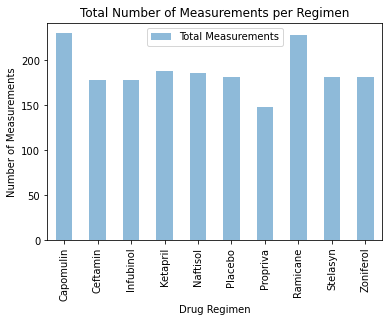

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drug_counts = clean_data.groupby("Drug Regimen").count()

pandas_bar = drug_counts[["Timepoint"]].rename(columns = {"Timepoint":"Total Measurements"})
pandas_bar.plot(kind = "bar", alpha = .50)
plt.ylabel("Number of Measurements")
plt.title("Total Number of Measurements per Regimen")
plt.show()

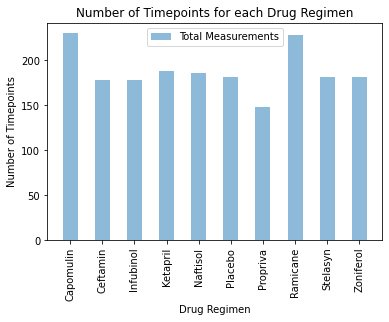

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = np.arange(len(group_drug_df))
tick_locations = [x *1.7 for x in x_axis]
plt.bar(tick_locations, drug_counts["Timepoint"], alpha = .5, align = "center", label = "Total Measurements")
plt.xticks(tick_locations, drug_counts.index, rotation = "vertical")
plt.xlabel("Drug Regimen")
plt.title("Number of Timepoints for each Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.legend(loc = "best")
plt.show()


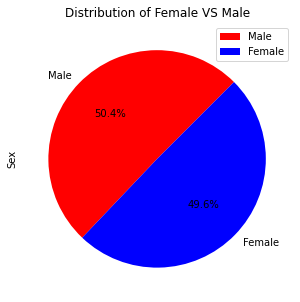

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_mouse = clean_data.drop_duplicates(subset = "Mouse ID")
gender_count = gender_mouse['Sex'].value_counts()
gender_df = pd.DataFrame(gender_count)

pandas_plot = gender_df.plot(kind='pie', y='Sex', figsize=(5,5), autopct="%1.1f%%", startangle=45, colors = ['red', 'blue'], title='Distribution of Female VS Male')

# show the plot
plt.show()

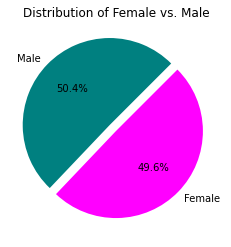

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_df
labels = ['Male','Female']
colors = ['teal','magenta']
explode = [0.1,0]
count = [125,123]

plt.pie(count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", startangle=45,)
plt.title('Distribution of Female vs. Male')
plt.show()

## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_list_df = clean_data.loc[(clean_data["Drug Regimen"] == "Capomulin") | (clean_data["Drug Regimen"] == "Ramicane" )|
                           (clean_data["Drug Regimen"] == "Infubinol") | (clean_data["Drug Regimen"] == "Ceftamin"), :]
drug_list_df
# Start by getting the last (greatest) timepoint for each mouse

mouse_grouped = clean_data.groupby(['Mouse ID'])
mouse_grouped_tp_max = pd.DataFrame({"Timepoint":(mouse_grouped['Timepoint'].max())})
#mouse_grouped_tp_max.reset_index()
mouse_grouped_tp_max
#drug_list_tp_max
#greatest_timepoint_mouse_df = pd.DataFrame({"Timepoint": drug_list_tp_max})
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_last_volume = pd.merge(clean_data, mouse_grouped_tp_max, how="inner", on=["Mouse ID", "Timepoint"])
mouse_last_volume
#checking data
#print(clean_data.loc[(clean_data["Mouse ID"] == "z314")])

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [25]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_drug_data = mouse_last_volume.loc[(mouse_last_volume["Drug Regimen"] == x), :]["Tumor Volume (mm3)"]
    tumor_volume_list.append(final_drug_data)
    
    # add subset 
    quartiles = final_drug_data.quantile([.25,.5,.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    
    iqr = upper_q - lower_q
    
    lower_b = lower_q - (1.5 * iqr)
    upper_b = upper_q + (1.5 * iqr)    
    
    # Determine outliers using upper and lower bounds
    outlier = final_drug_data[((final_drug_data < lower_b) | (final_drug_data > upper_b))]
    
    print(f"{x}'s potential outliers: {outlier}")
    # To Check whether the outlier is within the bounds: 
        # print(f"{x} -- Lower B: {lower_b} & Upper B: {upper_b} -- Outlier: {outlier}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


<AxesSubplot:title={'center':'Tumor Volume (mm3)'}, xlabel='Drug Regimen'>

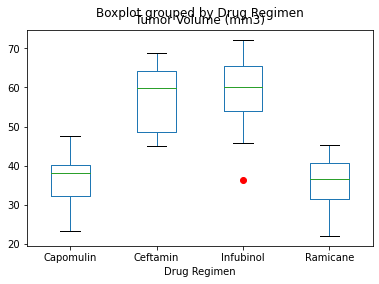

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
treatment_data = mouse_last_volume.loc[(mouse_last_volume["Drug Regimen"].isin(treatment_list)), :]
treatment_data

treatment_data.boxplot(by = "Drug Regimen", column = "Tumor Volume (mm3)", grid = False, sym = "r")

## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

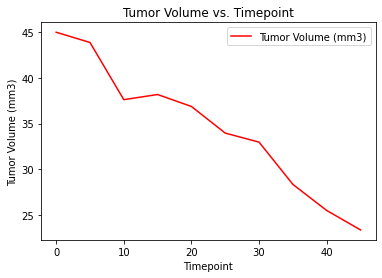

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_data = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin",:]
mouse = Capomulin_data.loc[Capomulin_data["Mouse ID"] == "s185"]

mouse.plot(kind = "line", color="r",x = "Timepoint", y = "Tumor Volume (mm3)")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.title("Tumor Volume vs. Timepoint")

plt.show

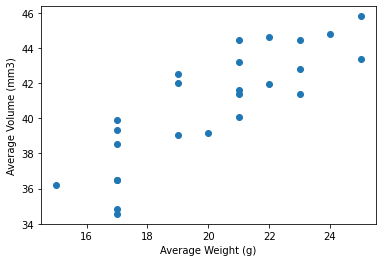

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
grouped_Cap_mouse = Capomulin_data.groupby(['Mouse ID'])
avg_volume = grouped_Cap_mouse["Tumor Volume (mm3)"].mean()
avg_weight = grouped_Cap_mouse["Weight (g)"].mean()

x_values = avg_weight
y_values = avg_volume
plt.scatter(x_values,y_values)
plt.xlabel('Average Weight (g)')
plt.ylabel('Average Volume (mm3)')
plt.show()

## Correlation and Regression

y = 0.95x +21.55
The r-value is: 0.7088568047708723


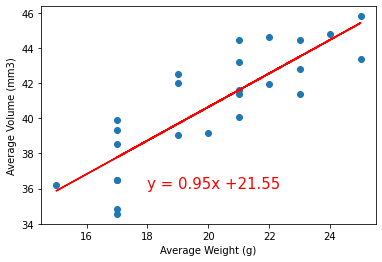

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
#print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.xlabel('Average Weight (g)')
plt.ylabel('Average Volume (mm3)')
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.annotate(line_eq,(18,36),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()